**Milestone 1**

The housing market has always been in a constant state of change and hard to predict. Using housing data from Zillow, an analysis on sales over the last 10 years can be conducted to see if there can be any identification of states that are increasing in price. More importantly, the analysis can include the trends over time.  The problem this analysis will solve is to research the trends of sales throughout time in different cities and states, to see where properties are the highest valued over time and how time has affected the sale prices. 

In [1]:
import pandas as pd 

In [2]:
# Read data
data = pd.read_csv('Sale_Prices_City.csv')

Here we can see a sample of the data.

In [3]:
data.head()

Unnamed: 0  RegionID   RegionName   StateName  SizeRank   2008-03  \
0           0      6181     New York    New York         1       NaN   
1           1     12447  Los Angeles  California         2  507600.0   
2           2     39051      Houston       Texas         3  138400.0   
3           3     17426      Chicago    Illinois         4  325100.0   
4           4      6915  San Antonio       Texas         5  130900.0   

    2008-04   2008-05   2008-06   2008-07  ...   2019-06   2019-07   2019-08  \
0       NaN       NaN       NaN       NaN  ...  563200.0  570500.0  572800.0   
1  489600.0  463000.0  453100.0  438100.0  ...  706800.0  711800.0  717300.0   
2  135500.0  132200.0  131000.0  133400.0  ...  209700.0  207400.0  207600.0   
3  314800.0  286900.0  274600.0  268500.0  ...  271500.0  266500.0  264900.0   
4  131300.0  131200.0  131500.0  131600.0  ...  197100.0  198700.0  200200.0   

    2019-09   2019-10   2019-11   2019-12   2020-01   2020-02   2020-03  
0  569900.0  560800.0  571500.0  575100.0  571700.0  568300.0  573600.0  
1  714100.0  711900.0  718400.0  727100.0  738200.0  760200.0       NaN  
2  207000.0  211400.0  211500.0  217700.0  219200.0  223800.0       NaN  
3  265000.0  264100.0  264300.0  270000.0  281400.0  302900.0  309200.0  
4  200800.0  203400.0  203800.0  205400.0  205400.0  208300.0       NaN  

[5 rows x 150 columns]

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib

The first graph shown will be a pie chart. This chart can give an overview of the distribution of States to see which have the most density (sales). 

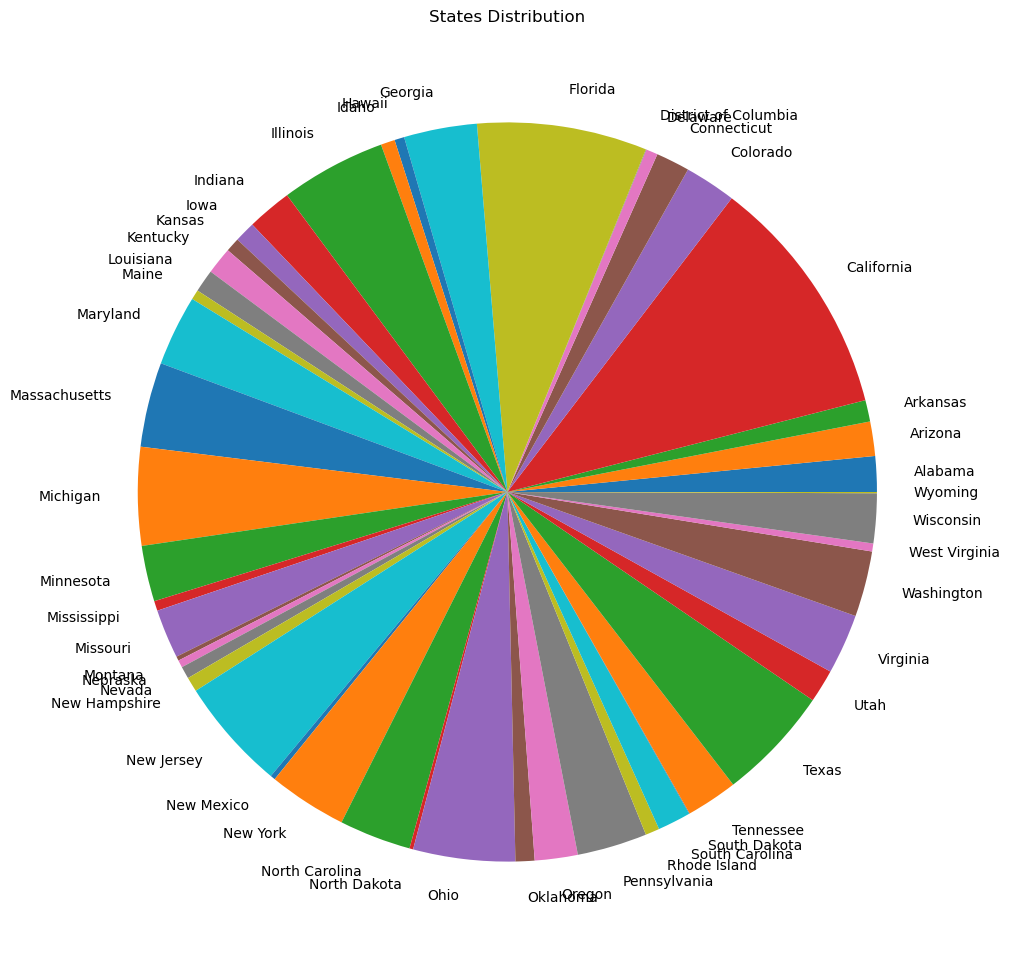

In [5]:
# Create data only containing StateName
pie_data = data.groupby('StateName').size()

# Make the pie plot with pandas
pie_data.plot(kind='pie', subplots=True, figsize=(12,12),  labeldistance=1.1)
plt.title("States Distribution")
plt.ylabel("")
plt.show()

When analyzing this chart, we can see that there are a few states that stick out in terms of size. These are California, Florida, and Massachusetts. 

The next graph that will be created, will be the sales of the first data point, March of 2008. This can be a good starting point to being to understand the changes of price over time. 

In [6]:
# Groups by state and sums the prices of March 2008
df_grouped = data.groupby('StateName').sum()['2008-03']

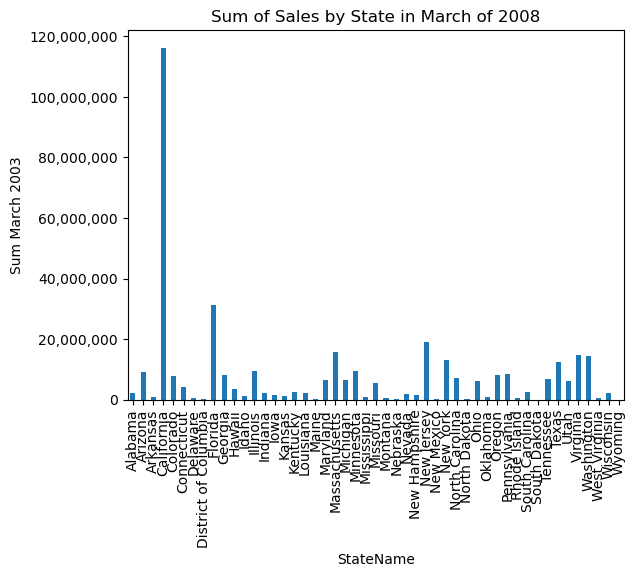

In [7]:
# Creates plot using grouped data
ax = df_grouped.plot(kind='bar')
# Formats numbers to regular notation instead of scientific
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# Creates Labels
plt.xlabel('StateName')
plt.ylabel('Sum March 2003')
plt.title('Sum of Sales by State in March of 2008')
# Rotates X labels 90 degrees
plt.xticks(rotation=90)
# Displays plot
plt.show()

This graph confirms some of the assumptions seen in the previous plot. This shows that in the month of March in 2008, the sum of total sales are the highest in California, Florida, New Jersey, and Massachusetts. 

Next, a graph using more recents sales, March of 2020.

In [8]:
# Grouping by State and sum of March of 2020
df_grouped2 = data.groupby('StateName').sum()['2020-03']

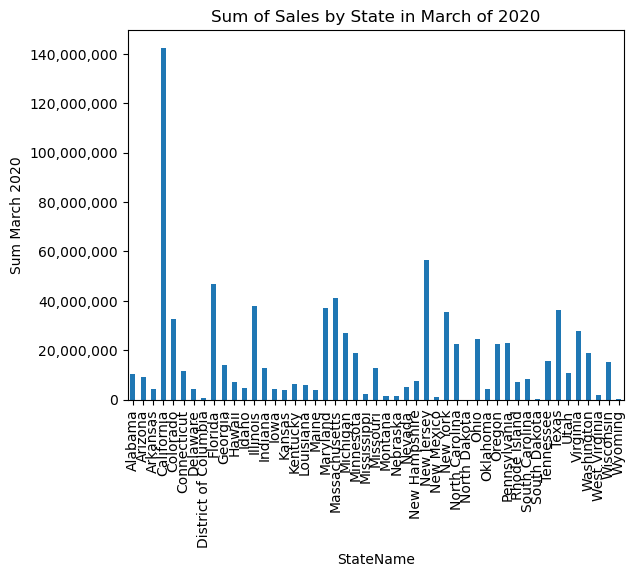

In [9]:
# Creates plot using the grouped data
ax = df_grouped2.plot(kind='bar')
# Formats numbers to regular notation instead of scientific
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# Creates Labels
plt.xlabel('StateName')
plt.ylabel('Sum March 2020')
plt.title('Sum of Sales by State in March of 2020')
# Rotates X-Labels 90 degrees
plt.xticks(rotation=90)
# Displays Plot
plt.show()

As expected, we see a rise in almost all states that are reporting data. Now, there are more states that share a similar amount in sales. Next, a stack plot can be created to see the two data sets overlayed.

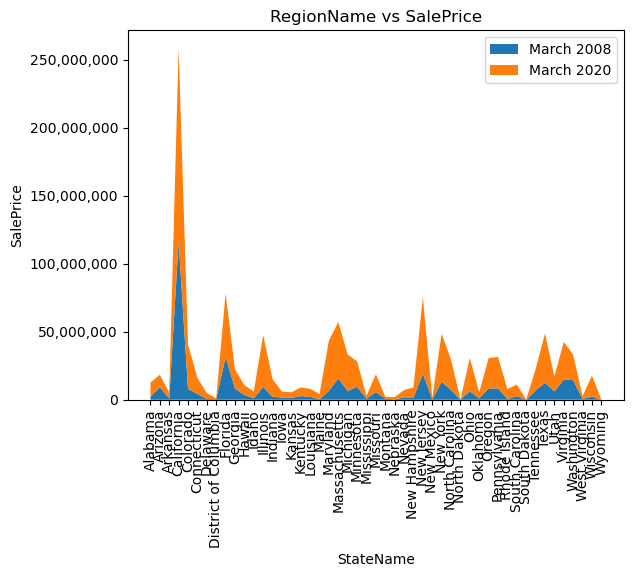

In [10]:
# Create figure and axes
fig, ax = plt.subplots()
# Plot data
ax.stackplot(df_grouped.index, df_grouped.values, df_grouped2.values, labels=['March 2008', 'March 2020'])
# Formats numbers to regular notation instead of scientific
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# Set labels
ax.set_xlabel('StateName')
ax.set_ylabel('SalePrice')
ax.set_title('RegionName vs SalePrice')
# Rotates X-Labels 90 Degrees
plt.xticks(rotation=90)
# Creates Legend
ax.legend()
# Displays plot
plt.show()

The graph above shows the changes in sales side by side from March 2008 to March 2020.

In more recent times, it can be seen that sales are higher than they were in 2008. The graphs created have demostrated those changes and show that certain states increased more than others. With this information, continuing analysis can be done to see which states have increased the most over time. These graphs begin to give some insight but more research will be conducted to see where the highest valued areas are located and where the increase is the highest. 

**Milestone 2**

The dataset used for modeling will be cleaned and new features will be created to aid with the model.

In [11]:
import pandas as pd 
# Formats numbers to regular view instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
# Read data
data2 = pd.read_csv('Sale_Prices_City.csv')

In [13]:
data2.head()

Unnamed: 0  RegionID   RegionName   StateName  SizeRank    2008-03  \
0           0      6181     New York    New York         1        NaN   
1           1     12447  Los Angeles  California         2 507600.000   
2           2     39051      Houston       Texas         3 138400.000   
3           3     17426      Chicago    Illinois         4 325100.000   
4           4      6915  San Antonio       Texas         5 130900.000   

     2008-04    2008-05    2008-06    2008-07  ...    2019-06    2019-07  \
0        NaN        NaN        NaN        NaN  ... 563200.000 570500.000   
1 489600.000 463000.000 453100.000 438100.000  ... 706800.000 711800.000   
2 135500.000 132200.000 131000.000 133400.000  ... 209700.000 207400.000   
3 314800.000 286900.000 274600.000 268500.000  ... 271500.000 266500.000   
4 131300.000 131200.000 131500.000 131600.000  ... 197100.000 198700.000   

     2019-08    2019-09    2019-10    2019-11    2019-12    2020-01  \
0 572800.000 569900.000 560800.000 571500.000 575100.000 571700.000   
1 717300.000 714100.000 711900.000 718400.000 727100.000 738200.000   
2 207600.000 207000.000 211400.000 211500.000 217700.000 219200.000   
3 264900.000 265000.000 264100.000 264300.000 270000.000 281400.000   
4 200200.000 200800.000 203400.000 203800.000 205400.000 205400.000   

     2020-02    2020-03  
0 568300.000 573600.000  
1 760200.000        NaN  
2 223800.000        NaN  
3 302900.000 309200.000  
4 208300.000        NaN  

[5 rows x 150 columns]

The initial dataset has three columns that provide information that will not be needed for this study. These are the columns "Unnamed:", "RegionId" and "SizeRank".

In [14]:
data2 = data2.drop(columns='Unnamed: 0')

In [15]:
data2 = data2.drop(columns='RegionID')

In [16]:
data2 = data2.drop(columns='SizeRank')

In [17]:
data2.head()

RegionName   StateName    2008-03    2008-04    2008-05    2008-06  \
0     New York    New York        NaN        NaN        NaN        NaN   
1  Los Angeles  California 507600.000 489600.000 463000.000 453100.000   
2      Houston       Texas 138400.000 135500.000 132200.000 131000.000   
3      Chicago    Illinois 325100.000 314800.000 286900.000 274600.000   
4  San Antonio       Texas 130900.000 131300.000 131200.000 131500.000   

     2008-07    2008-08    2008-09    2008-10  ...    2019-06    2019-07  \
0        NaN        NaN        NaN        NaN  ... 563200.000 570500.000   
1 438100.000 423200.000 407800.000 396300.000  ... 706800.000 711800.000   
2 133400.000 135400.000 138000.000 136400.000  ... 209700.000 207400.000   
3 268500.000 264400.000 267100.000 268400.000  ... 271500.000 266500.000   
4 131600.000 132300.000 131600.000 131800.000  ... 197100.000 198700.000   

     2019-08    2019-09    2019-10    2019-11    2019-12    2020-01  \
0 572800.000 569900.000 560800.000 571500.000 575100.000 571700.000   
1 717300.000 714100.000 711900.000 718400.000 727100.000 738200.000   
2 207600.000 207000.000 211400.000 211500.000 217700.000 219200.000   
3 264900.000 265000.000 264100.000 264300.000 270000.000 281400.000   
4 200200.000 200800.000 203400.000 203800.000 205400.000 205400.000   

     2020-02    2020-03  
0 568300.000 573600.000  
1 760200.000        NaN  
2 223800.000        NaN  
3 302900.000 309200.000  
4 208300.000        NaN  

[5 rows x 147 columns]

To help with identification, the column 'RegionName' can be renamed to CityName.

In [18]:
data2 = data2.rename(columns={'RegionName':'CityName'})

In [19]:
data2.head()

CityName   StateName    2008-03    2008-04    2008-05    2008-06  \
0     New York    New York        NaN        NaN        NaN        NaN   
1  Los Angeles  California 507600.000 489600.000 463000.000 453100.000   
2      Houston       Texas 138400.000 135500.000 132200.000 131000.000   
3      Chicago    Illinois 325100.000 314800.000 286900.000 274600.000   
4  San Antonio       Texas 130900.000 131300.000 131200.000 131500.000   

     2008-07    2008-08    2008-09    2008-10  ...    2019-06    2019-07  \
0        NaN        NaN        NaN        NaN  ... 563200.000 570500.000   
1 438100.000 423200.000 407800.000 396300.000  ... 706800.000 711800.000   
2 133400.000 135400.000 138000.000 136400.000  ... 209700.000 207400.000   
3 268500.000 264400.000 267100.000 268400.000  ... 271500.000 266500.000   
4 131600.000 132300.000 131600.000 131800.000  ... 197100.000 198700.000   

     2019-08    2019-09    2019-10    2019-11    2019-12    2020-01  \
0 572800.000 569900.000 560800.000 571500.000 575100.000 571700.000   
1 717300.000 714100.000 711900.000 718400.000 727100.000 738200.000   
2 207600.000 207000.000 211400.000 211500.000 217700.000 219200.000   
3 264900.000 265000.000 264100.000 264300.000 270000.000 281400.000   
4 200200.000 200800.000 203400.000 203800.000 205400.000 205400.000   

     2020-02    2020-03  
0 568300.000 573600.000  
1 760200.000        NaN  
2 223800.000        NaN  
3 302900.000 309200.000  
4 208300.000        NaN  

[5 rows x 147 columns]

The columns provide the data by month which can be used for analysis but analyzing year over year can give a quicker view. The columns need to be split by year and then all the data needs to be added by each similar year. The function below splits the column name and then adds the values in the dataframe.

In [20]:
# Function that splits column name and then adds values
def add_columns_by_year(df):
    # Split the year from the column
    years = [col.split('-')[0] for col in df.columns]
    # Group the columns by year and sum them
    grouped = df.groupby(years, axis=1).sum()
    return grouped

In [21]:
# Call to function
result = add_columns_by_year(data2)
result.head()

2008        2009        2010        2011        2012        2013  \
0       0.000       0.000  457300.000 5597200.000 5697000.000 5804300.000   
1 4333600.000 4093300.000 4244700.000 4079000.000 4165700.000 5326100.000   
2 1339800.000 1602700.000 1615800.000 1615800.000 1679400.000 1897400.000   
3 2782900.000 2741900.000 2462400.000 2192000.000 2178800.000 2536200.000   
4 1309900.000 1588500.000 1576700.000 1579600.000 1628300.000 1738900.000   

         2014        2015        2016        2017        2018        2019  \
0 5870900.000 6219500.000 6444300.000 6510700.000 6665700.000 6793500.000   
1 5515300.000 5917500.000 6367300.000 6817700.000 7667800.000 8478200.000   
2 2025300.000 2051800.000 2171900.000 2293200.000 2367300.000 2507100.000   
3 2867400.000 2840100.000 2631500.000 2722900.000 2960600.000 3234000.000   
4 1850100.000 1978500.000 2058100.000 2133300.000 2257700.000 2369900.000   

         2020     CityName   StateName  
0 1713600.000     New York    New York  
1 1498400.000  Los Angeles  California  
2  443000.000      Houston       Texas  
3  893500.000      Chicago    Illinois  
4  413700.000  San Antonio       Texas

After evalutation the dataframe, the City and State column are displayed at the last two columns. These need to be brought forward to the beginning.

In [22]:
# Removes Column from data
CityName = result.pop('CityName')
# Inserts Column in first position
result.insert(0, 'CityName', CityName)
# Removes Column from data
StateName = result.pop('StateName')
# Inserts Column in second position
result.insert(1, 'StateName', StateName)
result.head()

CityName   StateName        2008        2009        2010        2011  \
0     New York    New York       0.000       0.000  457300.000 5597200.000   
1  Los Angeles  California 4333600.000 4093300.000 4244700.000 4079000.000   
2      Houston       Texas 1339800.000 1602700.000 1615800.000 1615800.000   
3      Chicago    Illinois 2782900.000 2741900.000 2462400.000 2192000.000   
4  San Antonio       Texas 1309900.000 1588500.000 1576700.000 1579600.000   

         2012        2013        2014        2015        2016        2017  \
0 5697000.000 5804300.000 5870900.000 6219500.000 6444300.000 6510700.000   
1 4165700.000 5326100.000 5515300.000 5917500.000 6367300.000 6817700.000   
2 1679400.000 1897400.000 2025300.000 2051800.000 2171900.000 2293200.000   
3 2178800.000 2536200.000 2867400.000 2840100.000 2631500.000 2722900.000   
4 1628300.000 1738900.000 1850100.000 1978500.000 2058100.000 2133300.000   

         2018        2019        2020  
0 6665700.000 6793500.000 1713600.000  
1 7667800.000 8478200.000 1498400.000  
2 2367300.000 2507100.000  443000.000  
3 2960600.000 3234000.000  893500.000  
4 2257700.000 2369900.000  413700.000

Now that the years are extracted, the data can be grouped by state and city. This way, the analysis and regression can be done by those two variables. A total can be column will be created as well that will contain the data from all years. The data also has partial months for 2008 and 2020, these two years will be dropped from percentage change so that data with a full years worth will be used and analyzed.

In [23]:
# Groups by State and Sums values
sales_by_state_and_year = result.groupby('StateName').sum()
sales_by_state_and_year.head()

2008           2009           2010           2011  \
StateName                                                                
Alabama      23540500.000   30190100.000   35690200.000   36529000.000   
Arizona      82255000.000   84684400.000   79430400.000   73322700.000   
Arkansas     10166100.000   13352700.000   15423600.000   18001500.000   
California 1062767100.000 1151730100.000 1270672000.000 1254149500.000   
Colorado     78392800.000   98927500.000  109680500.000  131729600.000   

                     2012           2013           2014           2015  \
StateName                                                                
Alabama      46068100.000   58877400.000   70141500.000   83774700.000   
Arizona      77522600.000   98266200.000  112274100.000  121594400.000   
Arkansas     24754700.000   30623200.000   33655900.000   42085100.000   
California 1347562200.000 1646128100.000 1877307500.000 2095765300.000   
Colorado    156346900.000  179651600.000  213806800.000  253655300.000   

                     2016           2017           2018           2019  \
StateName                                                                
Alabama      94137100.000  115069200.000  126179700.000  132996500.000   
Arizona     142476000.000  163826400.000  180637800.000  189705100.000   
Arkansas     48388200.000   57610900.000   61427300.000   65008500.000   
California 2305135300.000 2505317200.000 2815191000.000 2848300300.000   
Colorado    295103600.000  339594300.000  377872300.000  394826100.000   

                    2020  
StateName                 
Alabama     33213700.000  
Arizona     41528300.000  
Arkansas    15875900.000  
California 608729600.000  
Colorado    98797900.000

In [24]:
# Calculates percentage change on the columns
pct_change_state = sales_by_state_and_year.pct_change(axis=1)*100
pct_change_state.head()

2008   2009   2010   2011   2012   2013   2014   2015   2016  \
StateName                                                                  
Alabama      NaN 28.247 18.218  2.350 26.114 27.805 19.131 19.437 12.369   
Arizona      NaN  2.953 -6.204 -7.689  5.728 26.758 14.255  8.301 17.173   
Arkansas     NaN 31.345 15.509 16.714 37.515 23.707  9.903 25.045 14.977   
California   NaN  8.371 10.327 -1.300  7.448 22.156 14.044 11.637  9.990   
Colorado     NaN 26.195 10.870 20.103 18.688 14.906 19.012 18.638 16.340   

             2017   2018  2019    2020  
StateName                               
Alabama    22.236  9.655 5.402 -75.027  
Arizona    14.985 10.262 5.020 -78.109  
Arkansas   19.060  6.624 5.830 -75.579  
California  8.684 12.369 1.176 -78.628  
Colorado   15.076 11.272 4.487 -74.977

In [25]:
# Calculates total of all sales
sales_by_state_and_year['Total'] = sales_by_state_and_year.sum(axis=1)
sales_by_state_and_year.head()

2008           2009           2010           2011  \
StateName                                                                
Alabama      23540500.000   30190100.000   35690200.000   36529000.000   
Arizona      82255000.000   84684400.000   79430400.000   73322700.000   
Arkansas     10166100.000   13352700.000   15423600.000   18001500.000   
California 1062767100.000 1151730100.000 1270672000.000 1254149500.000   
Colorado     78392800.000   98927500.000  109680500.000  131729600.000   

                     2012           2013           2014           2015  \
StateName                                                                
Alabama      46068100.000   58877400.000   70141500.000   83774700.000   
Arizona      77522600.000   98266200.000  112274100.000  121594400.000   
Arkansas     24754700.000   30623200.000   33655900.000   42085100.000   
California 1347562200.000 1646128100.000 1877307500.000 2095765300.000   
Colorado    156346900.000  179651600.000  213806800.000  253655300.000   

                     2016           2017           2018           2019  \
StateName                                                                
Alabama      94137100.000  115069200.000  126179700.000  132996500.000   
Arizona     142476000.000  163826400.000  180637800.000  189705100.000   
Arkansas     48388200.000   57610900.000   61427300.000   65008500.000   
California 2305135300.000 2505317200.000 2815191000.000 2848300300.000   
Colorado    295103600.000  339594300.000  377872300.000  394826100.000   

                    2020           Total  
StateName                                 
Alabama     33213700.000   886407700.000  
Arizona     41528300.000  1447523400.000  
Arkansas    15875900.000   436373600.000  
California 608729600.000 22788755200.000  
Colorado    98797900.000  2728385200.000

In [26]:
# Drops the years 2008 and 2020
pct_change_state = pct_change_state.drop(columns=['2008', '2020'])
pct_change_state.head()

2009   2010   2011   2012   2013   2014   2015   2016   2017  \
StateName                                                                   
Alabama    28.247 18.218  2.350 26.114 27.805 19.131 19.437 12.369 22.236   
Arizona     2.953 -6.204 -7.689  5.728 26.758 14.255  8.301 17.173 14.985   
Arkansas   31.345 15.509 16.714 37.515 23.707  9.903 25.045 14.977 19.060   
California  8.371 10.327 -1.300  7.448 22.156 14.044 11.637  9.990  8.684   
Colorado   26.195 10.870 20.103 18.688 14.906 19.012 18.638 16.340 15.076   

             2018  2019  
StateName                
Alabama     9.655 5.402  
Arizona    10.262 5.020  
Arkansas    6.624 5.830  
California 12.369 1.176  
Colorado   11.272 4.487

In [27]:

sales_by_city_and_year = result.groupby('CityName').sum()
sales_by_city_and_year.head()

2008        2009        2010        2011        2012  \
CityName                                                               
Aberdeen       0.000       0.000       0.000       0.000       0.000   
Abilene        0.000       0.000       0.000       0.000       0.000   
Abingdon 2418300.000 2701400.000 2746500.000 2565200.000 2480800.000   
Abington       0.000       0.000 2435100.000 2909200.000 3042500.000   
Accokeek       0.000       0.000       0.000       0.000       0.000   

                2013        2014        2015        2016        2017  \
CityName                                                               
Aberdeen 1109300.000 1922600.000 1925500.000 2036700.000 2119400.000   
Abilene   974300.000 1550500.000 1630700.000 1659100.000 1697300.000   
Abingdon 3050600.000 4473800.000 4564500.000 4485100.000 4568300.000   
Abington 3043200.000 3373600.000 3464000.000 3610200.000 3823300.000   
Accokeek       0.000  551200.000 3669200.000 3685700.000 3973400.000   

                2018        2019        2020  
CityName                                      
Aberdeen 2195300.000 2405500.000  717900.000  
Abilene  1754500.000 1940500.000  329400.000  
Abingdon 4809700.000 4869600.000 1062000.000  
Abington 4077400.000 4186800.000 1083200.000  
Accokeek 4220300.000 4340700.000 1112500.000

In [28]:
# Groups by city and adds values
pct_change_city = sales_by_city_and_year.pct_change(axis=1)*100
pct_change_city.head()

2008   2009  2010   2011   2012   2013   2014    2015   2016  2017  \
CityName                                                                       
Aberdeen   NaN    NaN   NaN    NaN    NaN    inf 73.317   0.151  5.775 4.060   
Abilene    NaN    NaN   NaN    NaN    NaN    inf 59.140   5.173  1.742 2.302   
Abingdon   NaN 11.707 1.670 -6.601 -3.290 22.968 46.653   2.027 -1.740 1.855   
Abington   NaN    NaN   inf 19.469  4.582  0.023 10.857   2.680  4.221 5.903   
Accokeek   NaN    NaN   NaN    NaN    NaN    NaN    inf 565.675  0.450 7.806   

          2018   2019    2020  
CityName                       
Aberdeen 3.581  9.575 -70.156  
Abilene  3.370 10.601 -83.025  
Abingdon 5.284  1.245 -78.191  
Abington 6.646  2.683 -74.128  
Accokeek 6.214  2.853 -74.370

In [29]:
# Drops years 2008 and 2020
pct_change_city = pct_change_city.drop(columns=['2008', '2020'])
pct_change_city.head()

2009  2010   2011   2012   2013   2014    2015   2016  2017  2018  \
CityName                                                                       
Aberdeen    NaN   NaN    NaN    NaN    inf 73.317   0.151  5.775 4.060 3.581   
Abilene     NaN   NaN    NaN    NaN    inf 59.140   5.173  1.742 2.302 3.370   
Abingdon 11.707 1.670 -6.601 -3.290 22.968 46.653   2.027 -1.740 1.855 5.284   
Abington    NaN   inf 19.469  4.582  0.023 10.857   2.680  4.221 5.903 6.646   
Accokeek    NaN   NaN    NaN    NaN    NaN    inf 565.675  0.450 7.806 6.214   

           2019  
CityName         
Aberdeen  9.575  
Abilene  10.601  
Abingdon  1.245  
Abington  2.683  
Accokeek  2.853

In [30]:
# Calculates total of all sales
sales_by_city_and_year['Total'] = sales_by_city_and_year.sum(axis=1)
sales_by_city_and_year.head()

2008        2009        2010        2011        2012  \
CityName                                                               
Aberdeen       0.000       0.000       0.000       0.000       0.000   
Abilene        0.000       0.000       0.000       0.000       0.000   
Abingdon 2418300.000 2701400.000 2746500.000 2565200.000 2480800.000   
Abington       0.000       0.000 2435100.000 2909200.000 3042500.000   
Accokeek       0.000       0.000       0.000       0.000       0.000   

                2013        2014        2015        2016        2017  \
CityName                                                               
Aberdeen 1109300.000 1922600.000 1925500.000 2036700.000 2119400.000   
Abilene   974300.000 1550500.000 1630700.000 1659100.000 1697300.000   
Abingdon 3050600.000 4473800.000 4564500.000 4485100.000 4568300.000   
Abington 3043200.000 3373600.000 3464000.000 3610200.000 3823300.000   
Accokeek       0.000  551200.000 3669200.000 3685700.000 3973400.000   

                2018        2019        2020        Total  
CityName                                                   
Aberdeen 2195300.000 2405500.000  717900.000 14432200.000  
Abilene  1754500.000 1940500.000  329400.000 11536300.000  
Abingdon 4809700.000 4869600.000 1062000.000 44795800.000  
Abington 4077400.000 4186800.000 1083200.000 35048500.000  
Accokeek 4220300.000 4340700.000 1112500.000 21553000.000

The final data sets created sales by year for cities and states. This aggregated data can be used to create models for the sales of the city feature and state feature. 

**Milestone 3**

For this project, a linear regression model will be created on the data. This method is being used because it can allow us to uncover patterns and relationships of the data. By exploring the different states, we can see how the predictions trend over time and what assumptions can be made of future data. Grouping the data by year will create different time stamps that can be used in the regression, as well as providing a full year's worth of data to analyze. 

In [31]:
# Groups by State and Sums values
StateDf = result.groupby(['StateName'], as_index=False).sum()
StateDf.head()

StateName           2008           2009           2010           2011  \
0     Alabama   23540500.000   30190100.000   35690200.000   36529000.000   
1     Arizona   82255000.000   84684400.000   79430400.000   73322700.000   
2    Arkansas   10166100.000   13352700.000   15423600.000   18001500.000   
3  California 1062767100.000 1151730100.000 1270672000.000 1254149500.000   
4    Colorado   78392800.000   98927500.000  109680500.000  131729600.000   

            2012           2013           2014           2015           2016  \
0   46068100.000   58877400.000   70141500.000   83774700.000   94137100.000   
1   77522600.000   98266200.000  112274100.000  121594400.000  142476000.000   
2   24754700.000   30623200.000   33655900.000   42085100.000   48388200.000   
3 1347562200.000 1646128100.000 1877307500.000 2095765300.000 2305135300.000   
4  156346900.000  179651600.000  213806800.000  253655300.000  295103600.000   

            2017           2018           2019          2020  
0  115069200.000  126179700.000  132996500.000  33213700.000  
1  163826400.000  180637800.000  189705100.000  41528300.000  
2   57610900.000   61427300.000   65008500.000  15875900.000  
3 2505317200.000 2815191000.000 2848300300.000 608729600.000  
4  339594300.000  377872300.000  394826100.000  98797900.000

In [32]:
# Reshapes data and includes years 2009-2019 to have only full years for the model
years = [str(year) for year in range(2009, 2020)]
StateDf = pd.melt(StateDf, id_vars=['StateName'], value_vars=years, var_name='Year', value_name='Sales')
StateDf.head()

StateName  Year          Sales
0     Alabama  2009   30190100.000
1     Arizona  2009   84684400.000
2    Arkansas  2009   13352700.000
3  California  2009 1151730100.000
4    Colorado  2009   98927500.000

In [33]:
# Drops any NaN to avoid errors
StateDf = StateDf.dropna(axis= 0, how='any')

In [34]:
# Separate the target from the features
x = StateDf.drop('Sales', axis=1)
y = StateDf['Sales']

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression()

In [37]:
# Convert the categorical variables (StateName) into numerical values
X_encoded = pd.get_dummies(x, drop_first=True)

In [39]:
# Creates model
model = regression.fit(X_encoded, y)

In [40]:
# Creates Predictions
y_pred_test = regression.predict(X_encoded)

In [41]:
# Creates dataframe with actual values and predicted values
diff = pd.DataFrame({'Actual': y, 'Predicted': y_pred_test})

In [42]:
diff.head()

Actual      Predicted
0   30190100.000   -9918894.620
1   84684400.000   34998069.017
2   13352700.000  -48039067.347
3 1151730100.000 1834408832.653
4   98927500.000  146584832.653

With the model fit and predictions created, the data can be joined to the original names to see how the values differ from the actual. With this dataframe, we can create plots of each state to see the predicted values and actual values graphed to understand how the predictions did. 

In [82]:
# Creates dataframe with original years and names
s = pd.concat([x, diff], axis=1)
s.head()

StateName  Year         Actual      Predicted
0     Alabama  2009   30190100.000   -9918894.620
1     Arizona  2009   84684400.000   34998069.017
2    Arkansas  2009   13352700.000  -48039067.347
3  California  2009 1151730100.000 1834408832.653
4    Colorado  2009   98927500.000  146584832.653

In [98]:
# Reshapes the data to have in the original format
ss = s.pivot_table(index='StateName', columns='Year', values=['Actual', 'Predicted'])
ss.head()

Actual                                               \
Year                 2009           2010           2011           2012   
StateName                                                                
Alabama      30190100.000   35690200.000   36529000.000   46068100.000   
Arizona      84684400.000   79430400.000   73322700.000   77522600.000   
Arkansas     13352700.000   15423600.000   18001500.000   24754700.000   
California 1151730100.000 1270672000.000 1254149500.000 1347562200.000   
Colorado     98927500.000  109680500.000  131729600.000  156346900.000   

                                                                        \
Year                 2013           2014           2015           2016   
StateName                                                                
Alabama      58877400.000   70141500.000   83774700.000   94137100.000   
Arizona      98266200.000  112274100.000  121594400.000  142476000.000   
Arkansas     30623200.000   33655900.000   42085100.000   48388200.000   
California 1646128100.000 1877307500.000 2095765300.000 2305135300.000   
Colorado    179651600.000  213806800.000  253655300.000  295103600.000   

                                          ...      Predicted                 \
Year                 2017           2018  ...           2010           2011   
StateName                                 ...                                 
Alabama     115069200.000  126179700.000  ...   -2145568.089    3058982.931   
Arizona     163826400.000  180637800.000  ...   42771395.547   47975946.568   
Arkansas     57610900.000   61427300.000  ...  -40265740.816  -35061189.796   
California 2505317200.000 2815191000.000  ... 1842182159.184 1847386710.204   
Colorado    339594300.000  377872300.000  ...  154358159.184  159562710.204   

                                                                        \
Year                 2012           2013           2014           2015   
StateName                                                                
Alabama      17768413.544   45015768.646   67821648.237   92367619.666   
Arizona      62685377.180   89932732.282  112738611.874  137284583.302   
Arkansas    -20351759.184    6895595.918   29701475.510   54247446.939   
California 1862096140.816 1889343495.918 1912149375.510 1936695346.939   
Colorado    174272140.816  201519495.918  224325375.510  248871346.939   

                                                                        
Year                 2016           2017           2018           2019  
StateName                                                               
Alabama     117146693.135  144804456.401  171443542.115  182290838.033  
Arizona     162063656.772  189721420.037  216360505.751  227207801.670  
Arkansas     79026520.408  106684283.673  133323369.388  144170665.306  
California 1961474420.408 1989132183.673 2015771269.388 2026618565.306  
Colorado    273650420.408  301308183.673  327947269.388  338794565.306  

[5 rows x 22 columns]

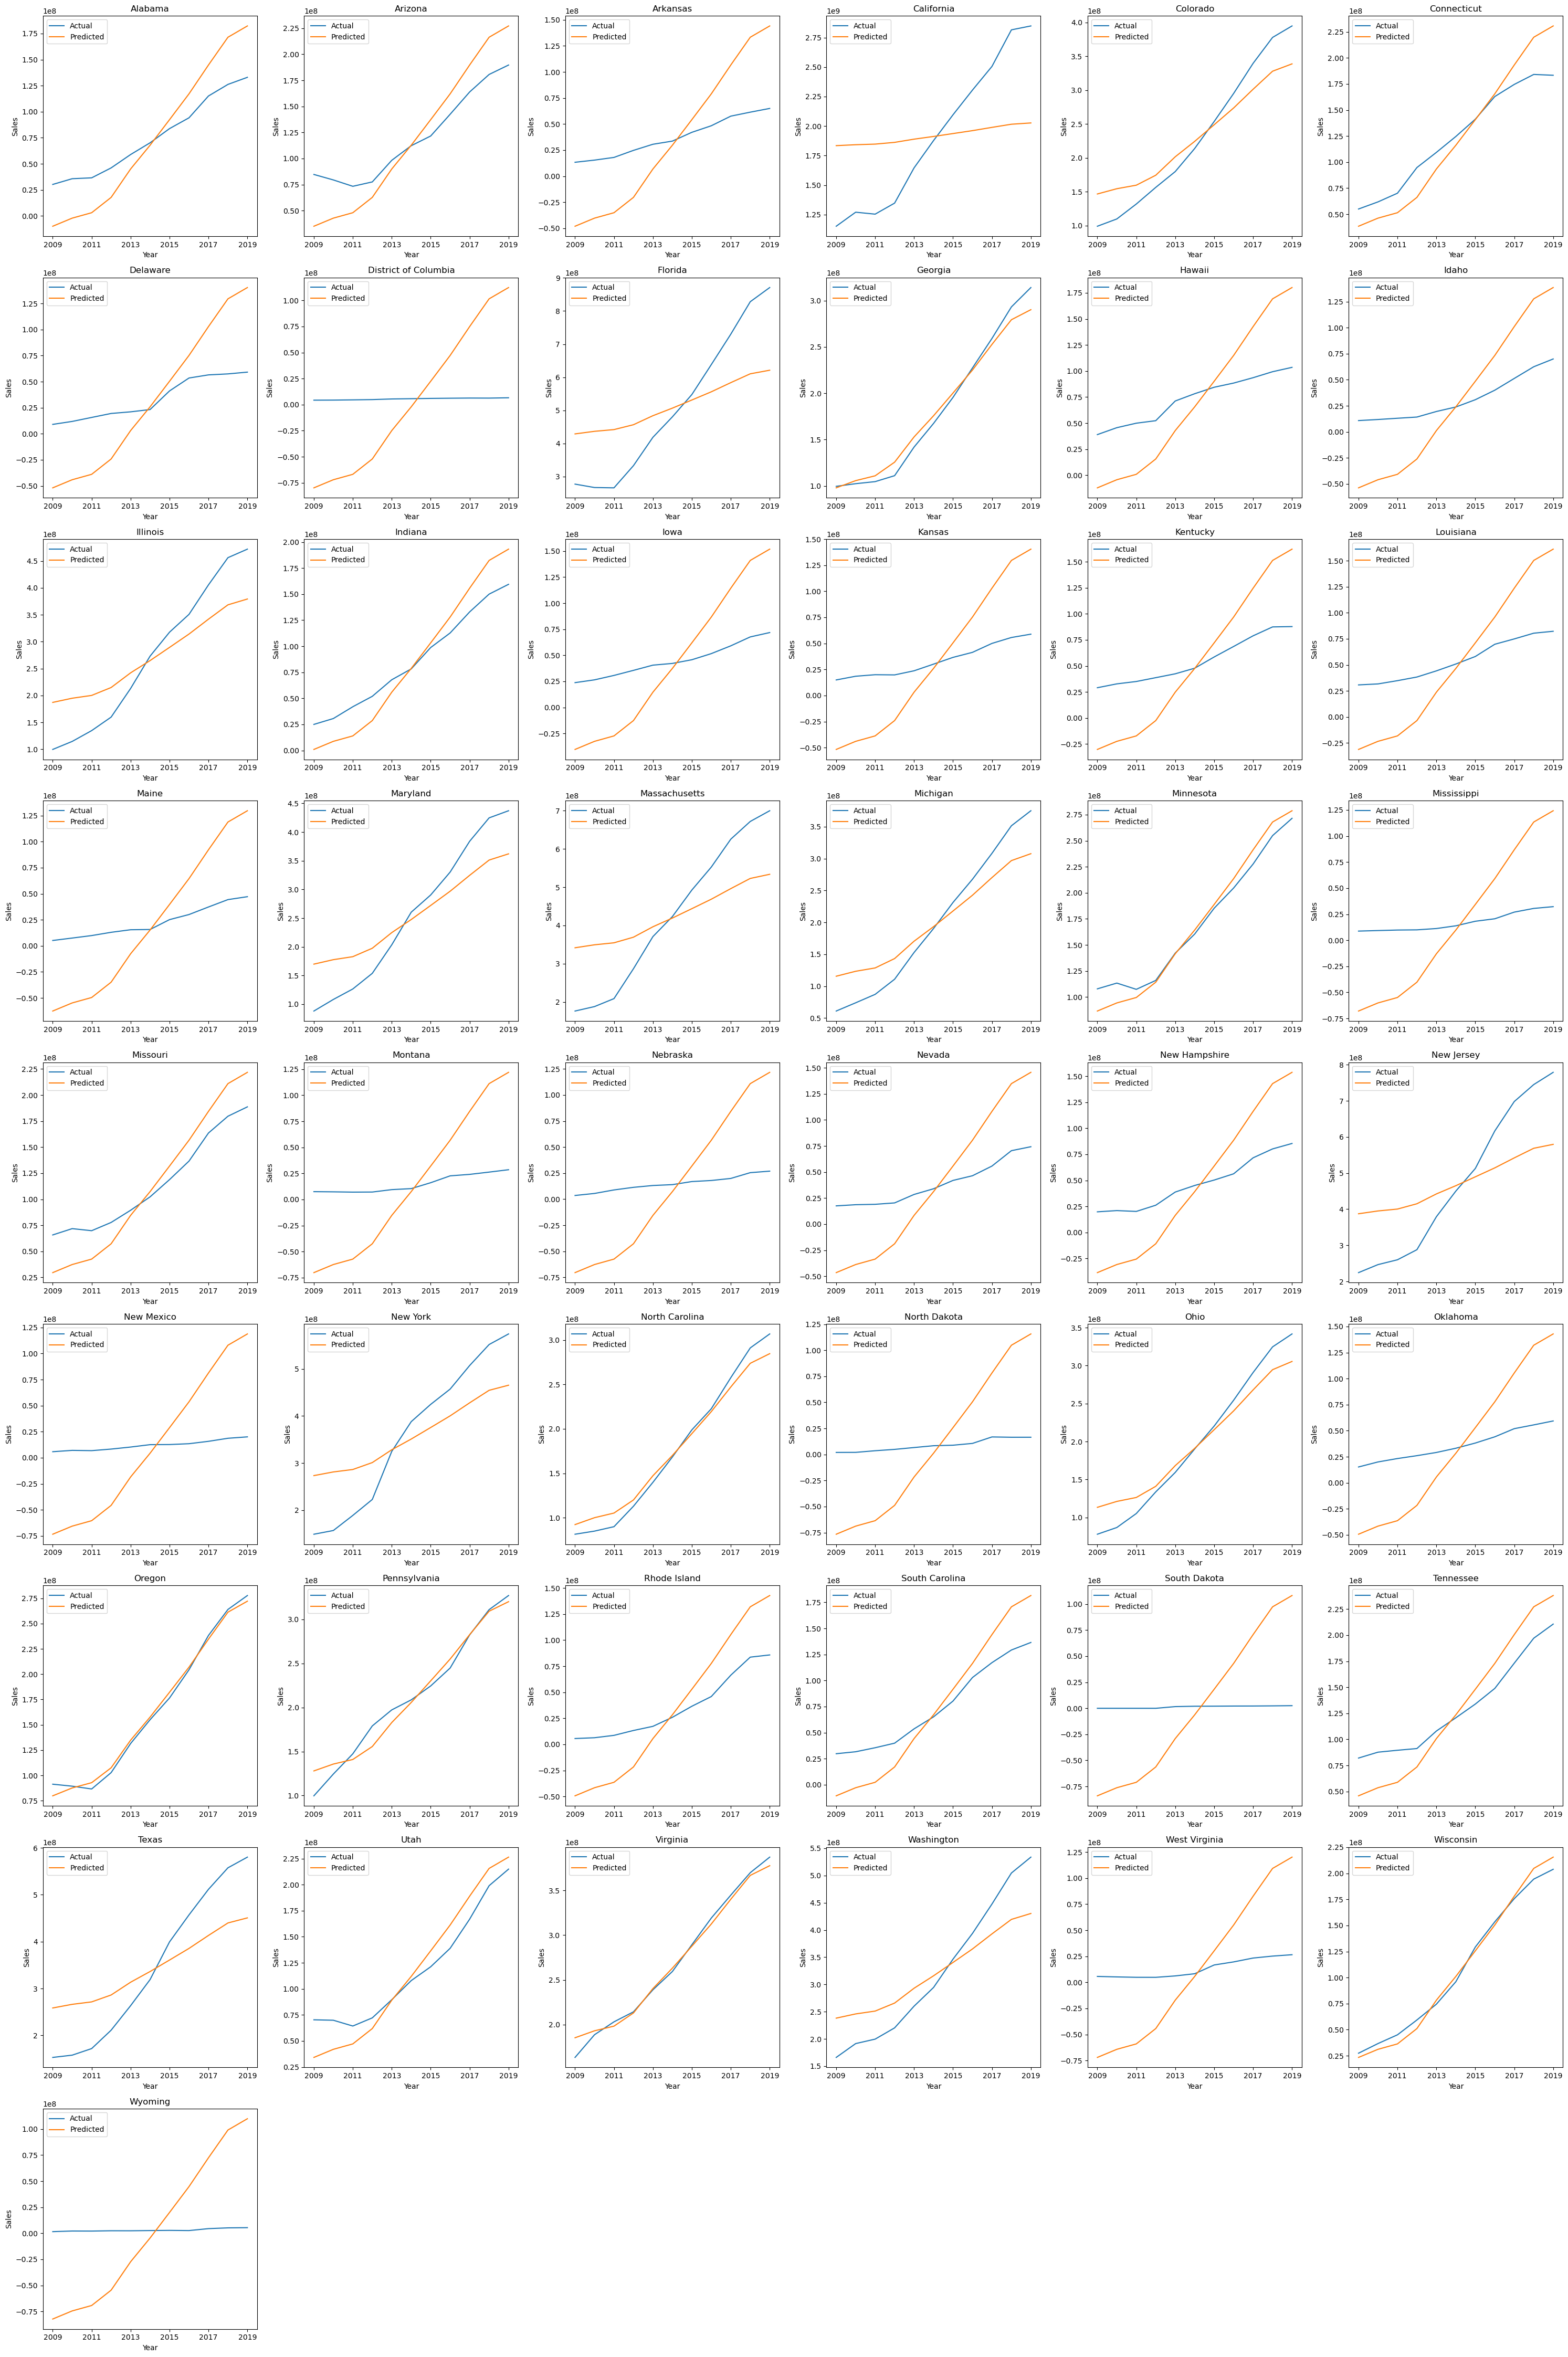

In [123]:
# Process to create all the plots. 

# Calculate the number of rows and columns needed for each plot
num_states = len(ss.index)
num_cols = 6
num_rows = (num_states + num_cols - 1) // num_cols

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 5*num_rows))

# Iterate over the states
for i, state in enumerate(ss.index):
    # Calculate the row and column index for the current state
    row = i // num_cols
    col = i % num_cols
    
    # Get the data for the current state
    data = ss.loc[state]
    
    # Create a plot for the current state
    ax = axes[row, col]
    ax.set_title(state)
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')
    
    # Plot the Actual values
    data['Actual'].plot(ax=ax, label='Actual')
    
    # Plot the Predicted values on top of the Actual values
    data['Predicted'].plot(ax=ax, label='Predicted')
    
    # Add a legend
    ax.legend()
    
# Remove any unused axes
if num_states < num_rows * num_cols:
    for i in range(num_states, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])
    
# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()

The plots above show the actual numbers and predictions by state. At a glance, it can be seen that many of the states predcited values are similar to the actual values. Also, almost all fit have the same positive trend where they increase sales over time. 

In [108]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [107]:
r2 = r2_score(y, y_pred_test)
mae = metrics.mean_absolute_error(y, y_pred_test)

In [106]:
print('Accuracy:', r2.round(2)*100,'%')
print('MAE:', mae.round(2))

Accuracy: 90.0 %
MAE: 51787151.26


The accuracy of the model was 90%. We can see from this model that many of the states follow a positive trend over time. Due to the high accuracy, we can see the predictions and actual sales are similar in most states. This model was able to accurately represent some of the states but with the data, there was some error to be expected. The MAE value tells us the average error is around 51 million, but when looking at sales, many lie in the 100s of millions or more, so this is a good value. 

Data Source: https://www.kaggle.com/datasets/paultimothymooney/zillow-house-price-data/discussion